<a href="https://colab.research.google.com/github/WellyOnGit/Proyek-Analisis-Data/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyek Analisis Data Dicoding**

- Nama : Justin Welly Panvito
- Dicoding username : justin_welly

Pertanyaan Bisnis :
1. Apa top product kategori?
2. Benua apa yang memiliki penjualan terbanyak agar kita bisa mencari tahu dimana tempat yang cocok untuk kita melebihi budget dalam iklan
3. Benua apa yang memiliki pengiriman waktu tersingkat

Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Dicoding Project/'

# 1. Data Wrangling


## 1.1 Load Data

In [ ]:
customers_dataset = pd.read_csv(path+'customers_dataset.csv')
geolocation_dataset = pd.read_csv(path+'geolocation_dataset.csv')
order_items_dataset = pd.read_csv(path+'order_items_dataset.csv')
order_payments_dataset= pd.read_csv(path+'order_payments_dataset.csv')
order_reviews_dataset= pd.read_csv(path+'order_reviews_dataset.csv')
orders_dataset= pd.read_csv(path+'orders_dataset.csv')
product_category_name_translation = pd.read_csv(path+'product_category_name_translation.csv')
products_dataset = pd.read_csv(path+'products_dataset.csv')
sellers_dataset = pd.read_csv(path+'sellers_dataset.csv')

data = {'orders_dataset': orders_dataset,
        'items_dataset': order_items_dataset,
        'products_dataset': products_dataset,
        'payments_dataset': order_payments_dataset,
        'reviews_dataset': order_reviews_dataset,
        'customers_dataset': customers_dataset,
        'sellers_dataset': sellers_dataset,
        'geo_dataset': geolocation_dataset,
        'translation_product_dataset': product_category_name_translation}

In [ ]:
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## 1.2 Assessing Data

### 1.2.1 Check data info

In [ ]:
for name, df in data.items():
  print('\n',data[name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

### 1.2.2 Convert Date to Datetime

In [ ]:
datetime_columns_orders_dataset= ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_columns_orders_dataset:
  orders_dataset[column] = pd.to_datetime(orders_dataset[column])

datetime_columns_order_reviews_dataset= ["review_creation_date","review_answer_timestamp"]
for column in datetime_columns_order_reviews_dataset:
  order_reviews_dataset[column] = pd.to_datetime(order_reviews_dataset[column])

datetime_columns_order_items_dataset=['shipping_limit_date']
for column in datetime_columns_order_items_dataset:
  order_items_dataset[column] = pd.to_datetime(order_items_dataset[column])

### 1.2.3 Check for duplicate data

In [ ]:
duplicated_dict = {}
total_count = {}


for name,df in data.items():
  duplicated_dict[name] = df.duplicated().sum()
  total_count[name] = df.shape[0]

summary_df = pd.DataFrame({
    'Total Count': total_count,
    'Duplicate Count': duplicated_dict
})

summary_df

,Total Count,Duplicate Count
orders_dataset,99441,0
items_dataset,112650,0
products_dataset,32951,0
payments_dataset,103886,0
reviews_dataset,99224,0
customers_dataset,99441,0
sellers_dataset,3095,0
geo_dataset,1000163,261831
translation_product_dataset,71,0


### 1.2.4 Handle Missing Value

In [ ]:
null_count_dict = {}

for name, df in data.items():
    null_count_dict[name] = df.isnull().sum()
    print(f"Null counts for {name}:\n{null_count_dict[name]}\n")


Null counts for orders_dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Null counts for items_dataset:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Null counts for products_dataset:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Null counts for payments_dataset:
order_id                0
payment_sequenti

## 1.3 Data Cleaning

## 1.3.1 Orders Dataset

In [ ]:
orders_dataset['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
na_counts = orders_dataset.groupby('order_status').apply(lambda x: x.isnull().sum())
na_counts.loc[:, (na_counts != 0).any(axis=0)]

In [ ]:
na_mean = orders_dataset.isnull().mean()
na_mean_sum = na_mean.sum()

print(f"Persentage non NA value: {100-na_mean_sum}")

Persentage non NA value: 99.95064410052191


I think i should just drop all of the NA value since the NA value is less than 1% of the entire data so it shouldn't effect the dataset

In [ ]:
orders_dataset = orders_dataset.dropna()
orders_dataset.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


In [ ]:
orders_dataset['delivered_on_time'] = np.where(orders_dataset['order_delivered_customer_date'] < orders_dataset['order_estimated_delivery_date'], 'On Time', 'Late')


## 1.3.2 Review Dataset

I think we should just drop the "review_comment_title" and "review_comment_message" column its not a big deal for the data

In [ ]:
order_reviews_dataset = order_reviews_dataset.drop(columns=['review_comment_title','review_comment_message'])
order_reviews_dataset.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_creation_date,0
review_answer_timestamp,0


## 1.3.3 Products Dataset

I also feel the same for 'product_name_lenght',
'product_description_lenght','product_weight_g','product_length_cm','product_height_cm'and 'product_width_cm'

In [ ]:
products_dataset = products_dataset.drop(columns=['product_name_lenght','product_description_lenght','product_weight_g','product_length_cm','product_height_cm','product_width_cm'])
products_dataset.isnull().sum()

,0
product_id,0
product_category_name,610
product_photos_qty,610


Replace unknown category name by other and photos_qty as 0 since there should be no photos if its NA

In [ ]:
products_dataset["product_category_name"].fillna(value="other",inplace = True)
products_dataset["product_photos_qty"].fillna(value="0",inplace=True)

## 1.3.4 Geo Dataset

In [ ]:
geolocation_dataset.drop_duplicates(inplace=True)

# 2. Exploratory Data Analysis (EDA)

## 2.1 Explore Customers Data

In [ ]:
customers_dataset.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
customers_dataset.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).head(5)


,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521


In [ ]:
customers_dataset.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).head(5)


,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045


## 2.2 Explore Orders Data

In [ ]:
orders_dataset.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
count,96461,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,2
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,On Time
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,88635
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,NaN
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,NaN
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,NaN
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,NaN
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,NaN
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,NaN


## 2.3 Explore Customers Data and Orders Data

Merge Customers and Orders Dataset

In [ ]:
customer_orders_dataset = pd.merge(
    customers_dataset,
    orders_dataset,
    how = "inner",
    on = "customer_id"
)
customer_orders_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


## 2.4 Explore Order Items Data & Sellers Data

In [ ]:
seller_order_items_dataset = pd.merge(
    order_items_dataset,
    sellers_dataset,
    how = "inner",
    on = "seller_id"
)
seller_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [ ]:
seller_order_items_dataset.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(5)


,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52


In [ ]:
seller_order_items_dataset.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(5)


,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171


## 2.5 Explore products data & translation data

Change the language of product_category_name

In [ ]:
translation_dict = dict(zip(product_category_name_translation['product_category_name'], product_category_name_translation['product_category_name_english']))
products_dataset['product_category_name'] = products_dataset['product_category_name'].map(translation_dict)
products_dataset.head()

,product_id,product_category_name,product_photos_qty
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,1.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,1.0
3,cef67bcfe19066a932b7673e239eb23d,baby,1.0
4,9dc1a7de274444849c219cff195d0b71,housewares,4.0


In [ ]:
sellers_orders_dataset = pd.merge(
    products_dataset,
    seller_order_items_dataset,
    how = "inner",
    on = "product_id"
)
sellers_orders_dataset.head()

,product_id,product_category_name,product_photos_qty,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,1.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,art,1.0,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,1.0,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,baby,1.0,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,housewares,4.0,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [ ]:
sellers_orders_dataset.groupby(by="product_category_name").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                            nunique    min      max
product_category_name                              
agro_industry_and_commerce      182  12.99  2990.00
air_conditioning                253  10.90  1599.00
art                             202   3.50  6499.00
arts_and_craftmanship            23   9.80   289.49
audio                           350  14.90   598.99
...                             ...    ...      ...
stationery                     2311   2.29  1693.00
tablets_printing_image           79  14.90   889.99
telephony                      4199   5.00  2428.00
toys                           3886   4.90  1699.99
watches_gifts                  5624   8.99  3999.90

[71 rows x 3 columns]

## 2.6 Explore payment data

In [ ]:
order_payments_dataset.head()


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
customer_orders_dataset = pd.merge(
    customer_orders_dataset,
    order_payments_dataset,
    how = "inner",
    on = "order_id"
)
customer_orders_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time,1,credit_card,2,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time,1,credit_card,8,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late,1,credit_card,7,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time,1,credit_card,1,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time,1,credit_card,8,252.25


## 2.7 Explore Data all_df

In [ ]:
all_df = pd.merge(
    customer_orders_dataset,
    sellers_orders_dataset,
    how = "inner",
    on = "order_id"
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_category_name,product_photos_qty,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,office_furniture,1.0,1,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,housewares,3.0,1,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,office_furniture,1.0,1,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,office_furniture,1.0,1,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,home_confort,1.0,1,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940,ibitinga,SP


In [ ]:
all_df.groupby(by=["customer_state", "product_category_name"]).agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

order_id  payment_value
customer_state product_category_name                           
SP             bed_bath_table               4347      756727.97
               computers_accessories        2615      622212.26
               health_beauty                3715      604699.12
               furniture_decor              2663      533514.77
               sports_leisure               3214      508950.16
...                                          ...            ...
BA             home_comfort_2                  1          29.69
GO             dvds_blu_ray                    1          28.01
PR             home_comfort_2                  1          28.00
ES             home_comfort_2                  1          28.00
MS             costruction_tools_tools         1          26.12

[1351 rows x 2 columns]

### Convert to csv

In [ ]:
all_df.to_csv('all_df.csv',index=False)


In [ ]:
df = all_df.copy()

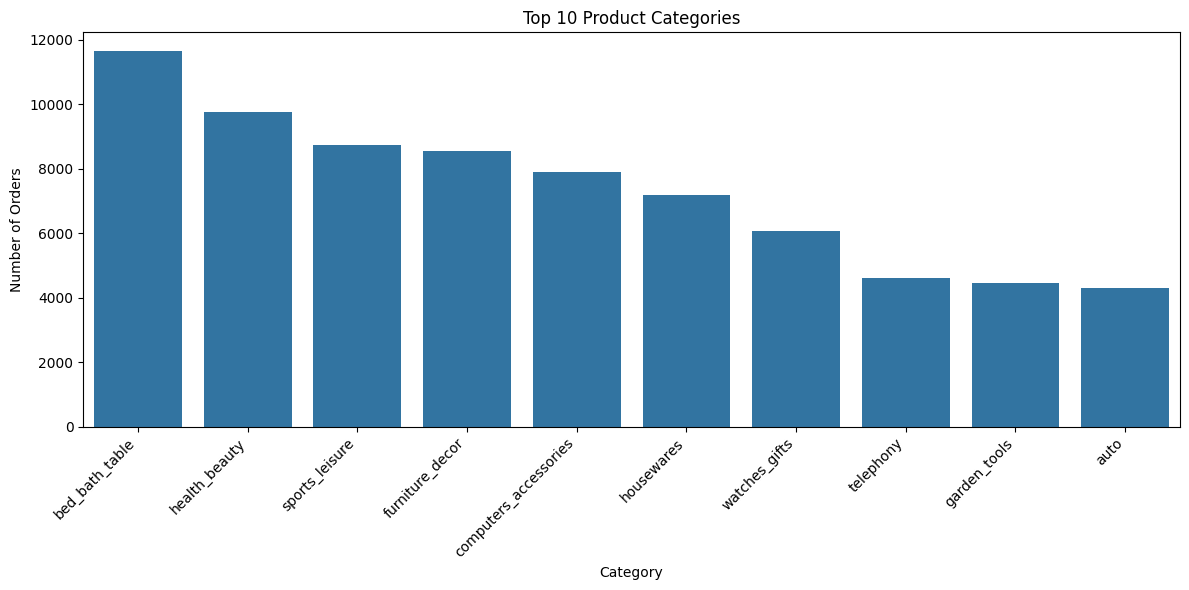

In [ ]:
plt.figure(figsize=(12, 6))
top_categories = df['product_category_name'].value_counts().nlargest(10)
sns.barplot(x=top_categories.index, y=top_categories.values)
plt.title('Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


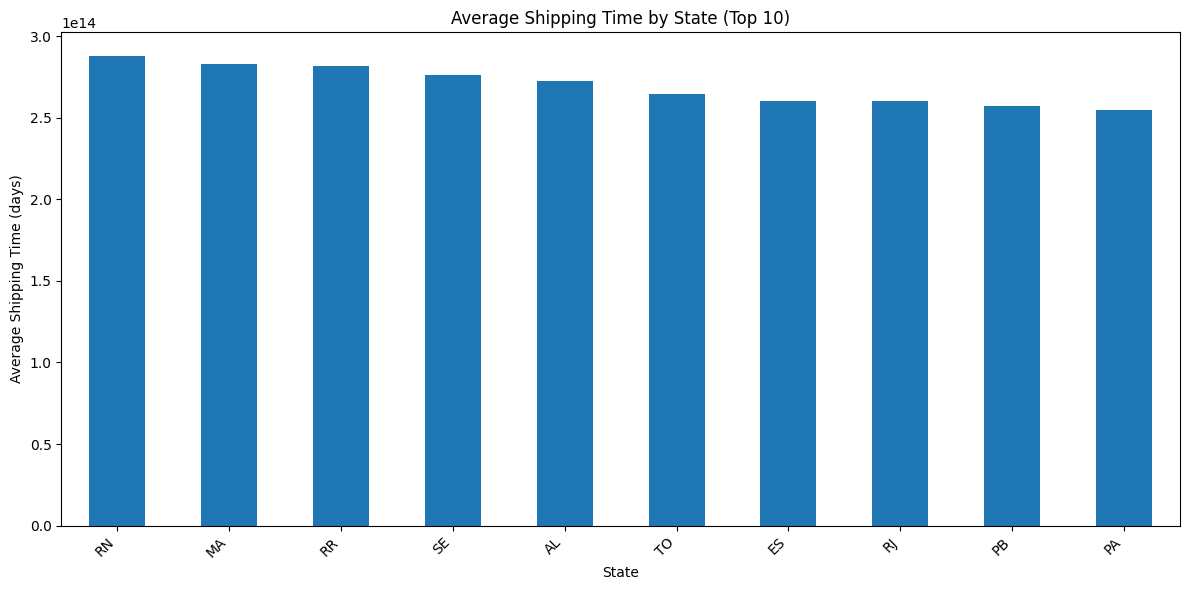

In [319]:
df['shipping_time'] = pd.to_datetime(df['order_delivered_carrier_date']) - pd.to_datetime(df['order_approved_at'])
avg_shipping_time_by_state = df.groupby('customer_state')['shipping_time'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_shipping_time = df.groupby('customer_state')['shipping_time'].mean().sort_values(ascending=False).head(10)
avg_shipping_time.plot(kind='bar')
plt.title('Average Shipping Time by State (Top 10)')
plt.xlabel('State')
plt.ylabel('Average Shipping Time (days)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
state_sales = df.groupby('customer_state')['price'].sum().sort_values(ascending=False).head()
state_sales.plot(kind='bar')
plt.title('Top 5 States by Sales Volume')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df['shipping_time'] = (df['order_delivered_carrier_date'] - df['order_approved_at']).dt.total_seconds() / 86400  # in days
df['approval_time'] = (df['order_approved_at'] - df['order_purchase_timestamp']).dt.total_seconds() / 3600  # in hours
df['total_delivery_time'] = (df['order_delivered_carrier_date'] - df['order_purchase_timestamp']).dt.total_seconds() / 86400  # in days
df = df[df['total_delivery_time'] >= 0]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='approval_time', y='total_delivery_time', hue='shipping_time', palette='viridis', size='shipping_time')

# Title and axes labels
plt.title('Approval Time vs Total Delivery Time')
plt.xlabel('Approval Time (hours)')
plt.ylabel('Total Delivery Time (days)')

plt.tight_layout()
plt.show()

1. Apa top product kategori?
> Kategori produk teratas berdasarkan jumlah pesanan adalah "bed bath table" dengan 11.629 pesanan, diikuti oleh "health beauty" dengan 9.745 pesanan, dan "sports_leisure" dengan 8.717 pesanan.

2. Negara apa yang memiliki penjualan terbanyak agar kita bisa mencari tahu dimana tempat yang cocok untuk kita melebihi anggaran iklan
> Mengenai penjualan terbanyak, negara bagian dengan penjualan tertinggi adalah Sao Paulo (SP) dengan total penjualan sebesar 5.300.857,70 , diikuti oleh Rio de Janeiro (RJ) dan Minas Gerais (MG). Jika kita ingin mengoptimalkan anggaran iklan, fokus pada daerah-daerah ini mungkin bisa memberikan hasil yang baik.


3. Negara apa yang memiliki pengiriman waktu tersingkat
> Meskipun ada perbedaan, waktu pengiriman di seluruh negara bagian yang diamati cukup konsisten, berkisar antara 2,95 hingga 3,33 hari.